Exploratory data analysis on Youth Unemployment rates

In [29]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# import dateset
data = pd.read_csv('../[AI]-Group Assignment 2/Youth-Unemployment-Rates.csv')
data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


<AxesSubplot: xlabel='Country Code'>

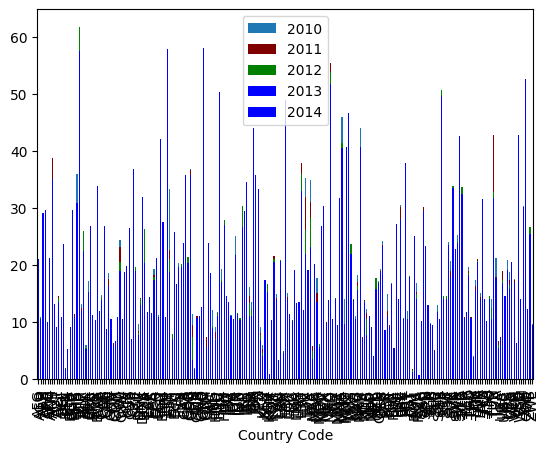

In [47]:
# histograms for unemployment over the 5 years
df = pd.DataFrame(data)
  
# plotting Height
ax = df.plot(x="Country Code", y="2010", kind="bar")
# plotting age on the same axis
df.plot(x="Country Code", y="2011", kind="bar", ax=ax, color="maroon")
df.plot(x="Country Code", y="2012", kind="bar", ax=ax, color="green")
df.plot(x="Country Code", y="2013", kind="bar", ax=ax, color="blue")
df.plot(x="Country Code", y="2014", kind="bar", ax=ax, color="blue")

In [24]:
# Filter out dupliates from countries 
display(list(data['Country Name'].unique()))

['Afghanistan',
 'Angola',
 'Albania',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Euro area',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'E

In [25]:
country_list = ['Afghanistan','Angola','Albania','Argentina','Armenia','Australia'
,'Austria','Azerbaijan','Burundi','Belgium','Benin','Burkina Faso','Bangladesh','Bulgaria'
,'Bahrain','Bosnia and Herzegovina','Belarus','Belize','Bolivia','Brazil','Barbados','Brunei Darussalam'
,'Bhutan','Botswana','Central African Republic','Canada','Switzerland','Chile','China','Cameroon'
,'Congo','Colombia','Comoros','Cabo Verde','Costa Rica','Cuba','Cyprus','Czech Republic','Germany'
,'Denmark','Dominican Republic','Algeria','Ecuador','Egypt','Spain','Estonia','Ethiopia','Finland','Fiji'
,'France','Gabon','United Kingdom','Georgia','Ghana','Guinea','Greece','Guatemala','Guyana','Hong Kong'
,'Honduras','Croatia','Haiti','Hungary','Indonesia','India','Ireland','Iran','Iraq','Iceland','Israel'
,'Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya','Cambodia','Korea, Rep.','Kuwait','Lebanon','Liberia'
,'Libya','Sri Lanka','Lesotho','Lithuania','Luxembourg','Latvia','Macao','Morocco','Moldova','Madagascar'
,'Maldives','Mexico','Macedonia','Mali','Malta','Myanmar','Montenegro','Mongolia','Mozambique','Mauritania'
,'Mauritius','Malawi','Malaysia','North America','Namibia','Niger','Nigeria','Nicaragua','Netherlands'
,'Norway','Nepal','New Zealand   ','Oman','Pakistan','Panama','Peru','Philippines','Papua New Guinea'
,'Poland','Puerto Rico','Portugal','Paraguay','Qatar','Romania','Russian Federation','Rwanda','Saudi Arabia'
,'Sudan','Senegal','Singapore','Solomon Islands','Sierra Leone','El Salvador','Somalia','Serbia','Slovenia'
,'Sweden','Swaziland','Syrian Arab Republic','Chad','Togo','Thailand','Tajikistan','Turkmenistan','Timor-Leste'
,'Trinidad and Tobago','Tunisia','Turkey','Tanzania','Uganda','Ukraine','Uruguay','United States','Uzbekistan'
,'Venezuela, RB','Vietnam','Yemen, Rep.','South Africa','Congo, Dem. Rep.','Zambia','Zimbabwe'
]

In [26]:
country_clean = data[data['Country Name'].isin(country_list)]

Unemployment rate over the 5years

In [27]:
difference = country_clean['2014'].values - country_clean['2010'].values

In [28]:

x, y = (list(x) for x in zip(*sorted(zip(difference, country_clean['Country Name'].values), reverse = True)))
                                                            
# top and bottom 15 countries with the most changes in their unemployment
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

/tmp/ipykernel_14400/3085773650.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  country_pivot = country_final.pivot("Country Name","Year",  "key")


Text(0.5, 1.0, 'Change in Unemployment rate ( Warmer: Higher rate, Cooler: Lower rate )')

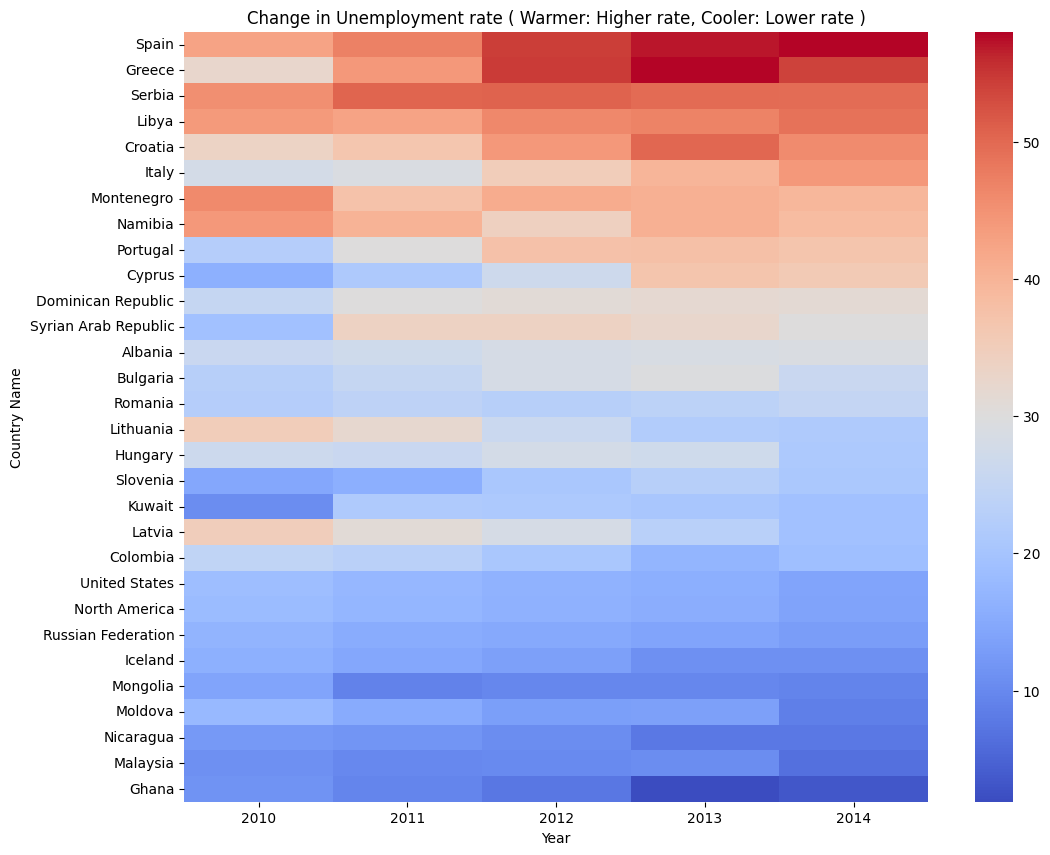

In [31]:
# Resize dataframe
keys = [c for c in country_clean if c.startswith('20')]
country_resize = pd.melt(country_clean, id_vars='Country Name', value_vars=keys, value_name='key')
country_resize['Year'] = country_resize['variable']

# Use boolean filtering to extract only top 15 and bottom 15 moving countries
mask = country_resize['Country Name'].isin(Y)
country_final = country_resize[mask]

# plot the seaborn heatmap
plt.figure(figsize=(12,10))
country_pivot = country_final.pivot("Country Name","Year",  "key")
country_pivot = country_pivot.sort_values('2014', ascending=False)
ax = sns.heatmap(country_pivot, cmap='coolwarm', annot=False, linewidths=0, linecolor='white')
plt.title('Change in Unemployment rate ( Warmer: Higher rate, Cooler: Lower rate )')
